[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW5.ipynb)

**Problem 1**: In class when we used the linnerud data, we assumed that Weight was the target variable and Chins was the predictor. For this problem use Pulse as the target variable and Situps as the predictor.

Part a. Make a scatterplot of Pulse versus Situps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud

linnerud = load_linnerud(as_frame=True)

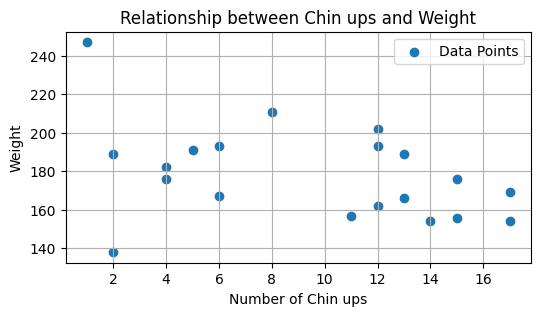

In [2]:
x = linnerud.data['Chins']
y = linnerud.target['Weight']

plt.figure(figsize=(6, 3))

plt.scatter(x, y, label='Data Points')

plt.title('Relationship between Chin ups and Weight')
plt.xlabel('Number of Chin ups')
plt.ylabel('Weight')

plt.legend()
plt.grid(True)
plt.show()

Part b. Fit a simple linear regression model to the data using Situps as a predictor and Pulse as the target.

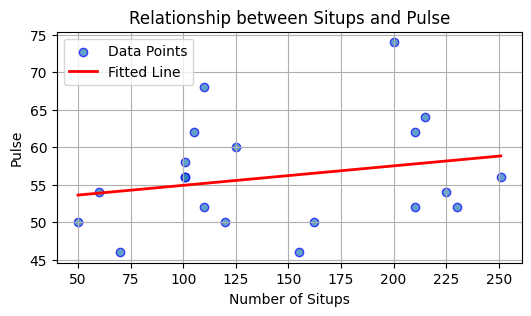

In [11]:
x = linnerud.data['Situps'].values.reshape(-1, 1) # Reshape x to be 2D
y = linnerud.target['Pulse']

from sklearn.linear_model import LinearRegression

reg_prep = LinearRegression()
mod_reg = reg_prep.fit(x,y)

Beta_0 = mod_reg.intercept_
Beta_1 = mod_reg.coef_[0]

plt.figure(figsize=(6,3))
plt.scatter(x, y, label='Data Points', alpha=0.7, edgecolors='b')
x_axis = np.linspace(min(x), max(x), 100).reshape(-1, 1) # Reshape x_axis for prediction

plt.plot(x_axis, Beta_0 + Beta_1 * x_axis, label='Fitted Line', linewidth=2, color='r')

plt.title('Relationship between Situps and Pulse')
plt.xlabel('Number of Situps')
plt.ylabel('Pulse')
plt.legend()

plt.grid(True)
plt.show()

Part c. What are the estimated slope and intercept of the model?

In [12]:
print('intercept:', mod_reg.intercept_)
print('slope:', mod_reg.coef_)

intercept: 52.32529029490991
slope: [0.02593411]


Part d. Make a new plot of the data with the regression line plotted on top of it.

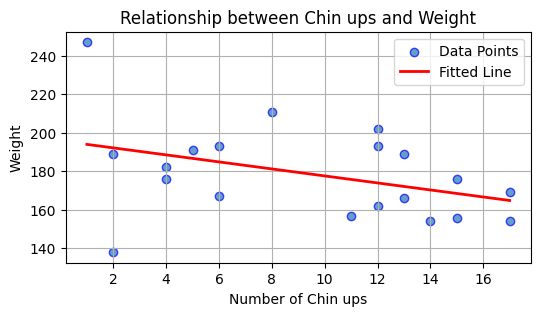

In [15]:
x = linnerud.data['Chins'].values.reshape(-1, 1) # Reshape x to be 2D
y = linnerud.target['Weight']

reg_prep = LinearRegression()
mod_reg = reg_prep.fit(x,y)

Beta_0 = mod_reg.intercept_
Beta_1 = mod_reg.coef_[0]

plt.figure(figsize=(6,3))
plt.scatter(x, y, label='Data Points', alpha=0.7, edgecolors='b')
x_axis = np.linspace(min(x), max(x), 100).reshape(-1, 1) # Reshape x_axis for prediction

plt.plot(x_axis, Beta_0 + Beta_1 * x_axis, label='Fitted Line', linewidth=2, color='r')

# Correct the plot title and labels
plt.title('Relationship between Chin ups and Weight')
plt.xlabel('Number of Chin ups')
plt.ylabel('Weight')

plt.legend()

plt.grid(True)
plt.show()

**Problem 2**: Consider modeling $Y$ as a function of $X$ using linear regression in two different contexts. (A) $Y$ follows a normal distribution with mean $\beta_0 + \beta_1 X$ and variance $\sigma^2$ and (B) the regression line that minimizes the target function $\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$.

Part a. What is the difference between the estimates for $\beta_0$ and $\beta_1$ when using maximum likelihood estimation for (A) and target function minimization for (B).

They are the same for both A and B. The B0 is the intercept and the B1 is the slope.

Part b. What is the difference in the estimate for $\sigma$ between the two methods?

In A, there is a 𝜎 which leads to some uncertainty in the estimates, but for B, there is no 𝜎 which means there is no uncertainity built into the models

**Problem 3** : Use the code in the following chunk to import the car stopping data set into your python environment. This data set has two variables. The variable speed is the speed a car is going and dist is the distance the car traveled before stopping. Use speed as a predictor and dist as a target variable for the following questions.

In [17]:
%pip install pydataset
from pydataset import data
cars = data("cars")
x = cars.speed
y = cars.dist

Part a. Build a decision tree with a maximum depth of 2. Plot the tree.

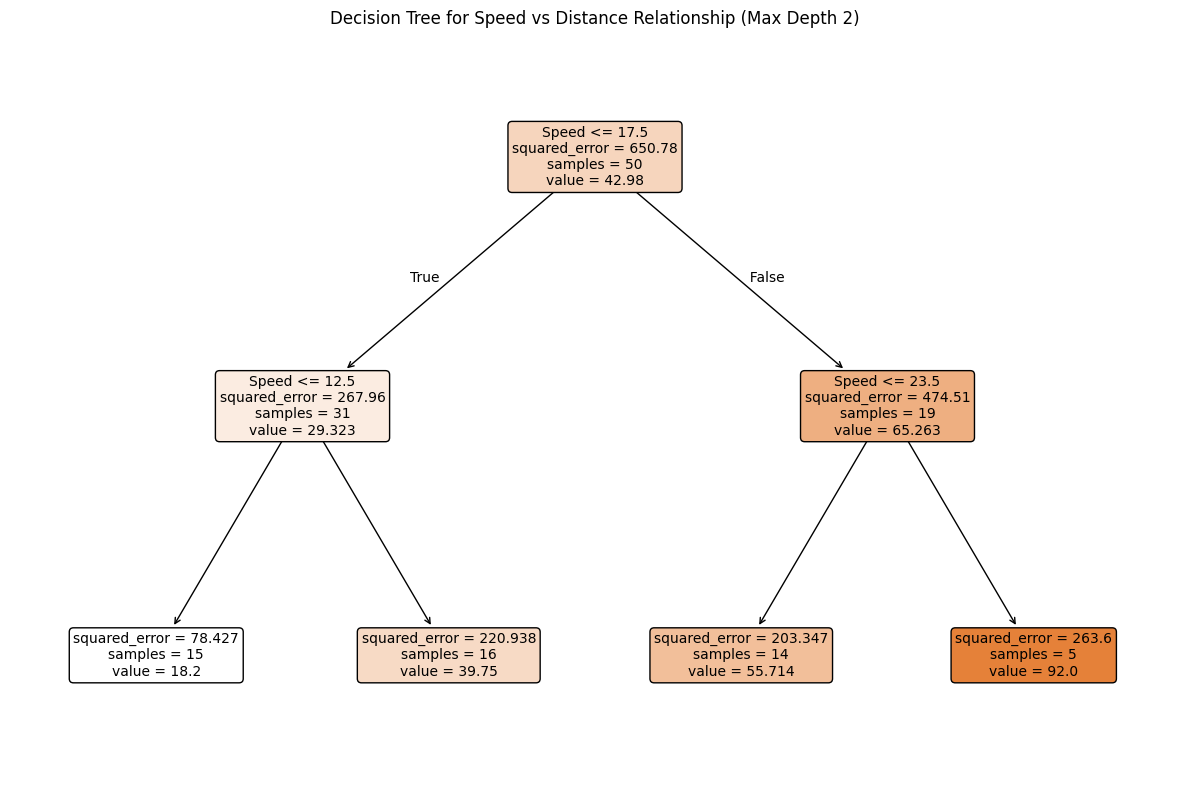

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pandas as pd

x_reshaped = x.values.reshape(-1, 1)

x_df = pd.DataFrame(x_reshaped, columns=['Speed'])

regressor = DecisionTreeRegressor(max_depth=2)

fitted_tree = regressor.fit(x_df, y)

plt.figure(figsize=(12, 8))
tree.plot_tree(fitted_tree, feature_names=["Speed"], fontsize=10, filled=True, rounded=True)
plt.title("Decision Tree for Speed vs Distance Relationship (Max Depth 2)")
plt.tight_layout()

plt.show()

Part b. What is the split point for the first split in the decision tree?

Speed <= 17.5

Part c. How many data points end up in each leaf node of the decision tree.

15, 16, 14, 5

Part. d. Using the decision tree model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

39.75

**Problem 4**: Test a few other models for the car data set.

Part a. Build the decision tree with a maximum depth of 3 instead of 2. For this model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

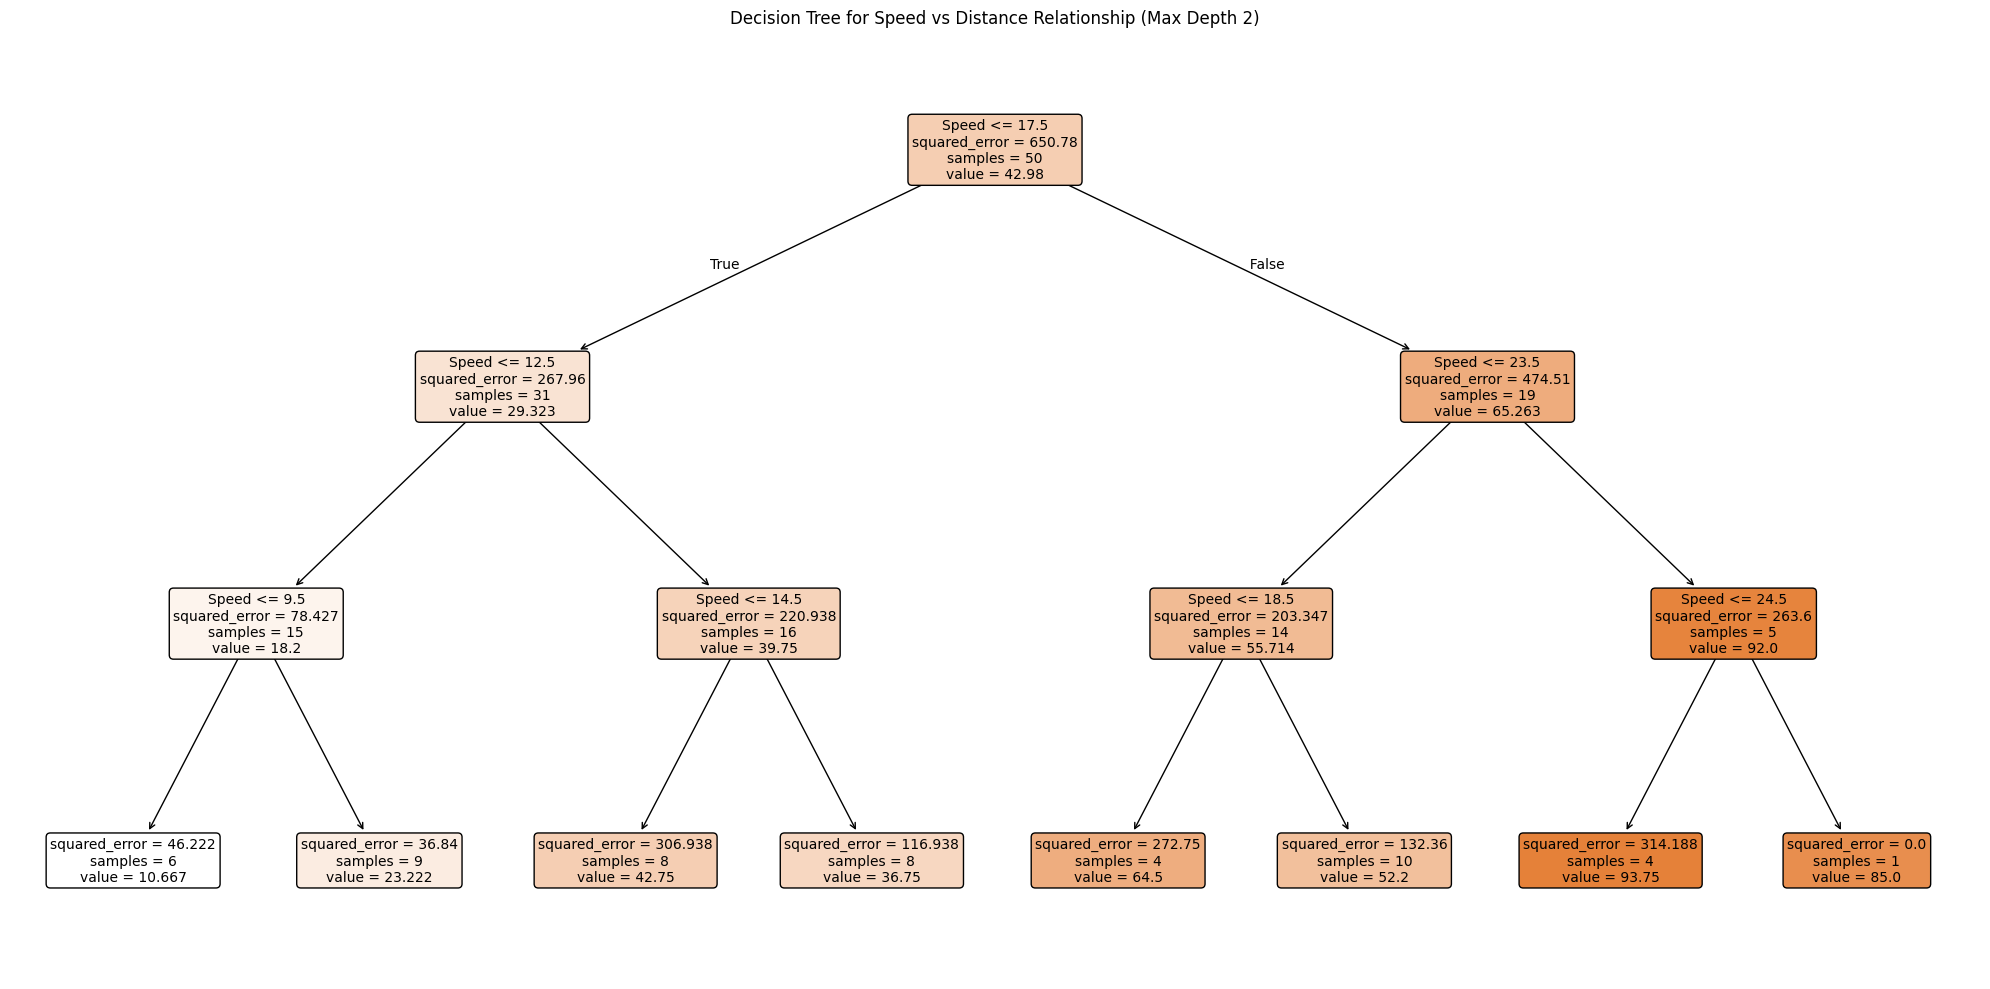

Estimated stopping distance of a car traveling at a speed of 15 is 36.75


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pandas as pd

x_reshaped = x.values.reshape(-1, 1)

x_df = pd.DataFrame(x_reshaped, columns=['Speed'])

regressor = DecisionTreeRegressor(max_depth=3)

fitted_tree = regressor.fit(x_df, y)

plt.figure(figsize=(20, 10))
tree.plot_tree(fitted_tree, feature_names=["Speed"], fontsize=10, filled=True, rounded=True)
plt.title("Decision Tree for Speed vs Distance Relationship (Max Depth 2)")
plt.tight_layout()

plt.show()

print('Estimated stopping distance of a car traveling at a speed of 15 is 36.75')

Part b. Fit a linear regression model to this data. For this model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

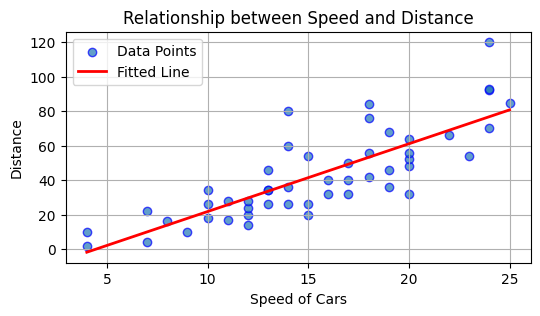

Estimated stopping distance at 15 mph: 41.41


In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

reg_prep = LinearRegression()
mod_reg = reg_prep.fit(x_reshaped, y)

Beta_0 = mod_reg.intercept_
Beta_1 = mod_reg.coef_[0]

plt.figure(figsize=(6,3))
plt.scatter(x_reshaped, y, label='Data Points', alpha=0.7, edgecolors='b')
x_axis = np.linspace(min(x_reshaped), max(x_reshaped), 100).reshape(-1, 1)

plt.plot(x_axis, Beta_0 + Beta_1 * x_axis, label='Fitted Line', linewidth=2, color='r')

plt.title('Relationship between Speed and Distance')
plt.xlabel('Speed of Cars')
plt.ylabel('Distance')
plt.legend()

plt.grid(True)
plt.show()

estimated_distance_15mph = Beta_0 + Beta_1 * 15
print(f"Estimated stopping distance at 15 mph: {estimated_distance_15mph:.2f}")

**Problem 5**: A store with an online presence collects revenue data by month. This data can be found at [richardson.byu.edu/220/revenue_data.csv](https://richardson.byu.edu/220/revenue_data.csv). The variable MonthlyRevenue is the target variable. Money spent on ads (AdSpend), site traffic (AvgTraffic), and discount rates (DiscountRate) are the variables.

Part a. Build a linear regression model for revenue using the other variables as predictors.

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

X = revenue_df[['AdSpend', 'AvgTraffic', 'DiscountRate']]
y = revenue_df['MonthlyRevenue']

model = LinearRegression()

model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept: {intercept:.2f}")
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"  {feature}: {coef:.2f}")

Intercept: 45.95
Coefficients:
  AdSpend: 3.20
  AvgTraffic: 0.00
  DiscountRate: -0.41


Part b. Interpret the coefficient for AdSpend in the context of the problem.

For each dollar increase spent on ads, the revenue increases by about $3.20 holding all else constant.